In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

(400, 400)


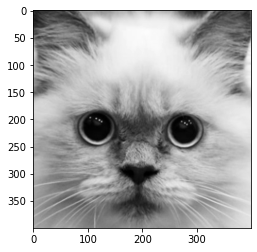

In [3]:
cat_img = cv2.imread('COMP9517_22T2_Lab1_Images/Cat.png', 0)
print(cat_img.shape)
plt.imshow(cat_img, cmap='gray', vmin=0, vmax=255 )
plt.show()

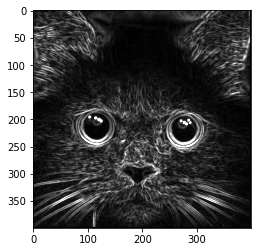

In [21]:
row, col = cat_img.shape
sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

cat_filtered = np.zeros((row, col))
for r in range(row - 2):
    for c in range(col - 2):
        gx = (cat_img[r:r+3, c:c+3] * sobel_x).sum()
        gy = (cat_img[r:r+3, c:c+3] * sobel_y).sum()
        cat_filtered[r, c] = (gx * gx + gy * gy) ** 0.5
plt.imshow(cat_filtered, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave('sobel_filtered_cat.png', cat_filtered)

(400, 400, 3)


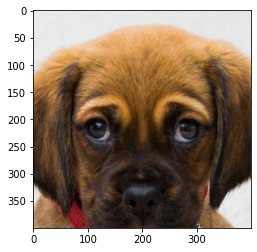

In [22]:
dog_bgr_img = cv2.imread('COMP9517_22T2_Lab1_Images/Dog.png') # rgb
dog_rgb_img = dog_bgr_img[:,:,::-1]
print(dog_rgb_img.shape)
plt.imshow(dog_rgb_img)
plt.show()

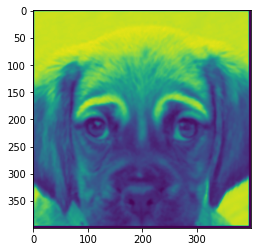

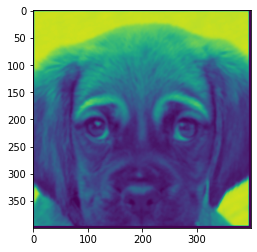

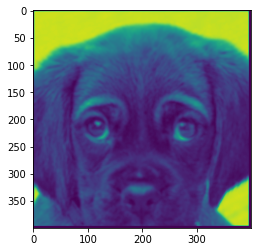

In [23]:
row = dog_rgb_img.shape[0]
col = dog_rgb_img.shape[1]

r_raw, g_raw, b_raw = cv2.split(dog_rgb_img)

kernel = np.ones([5, 5])
r_filtered = np.zeros((row, col))
g_filtered = np.zeros((row, col))
b_filtered = np.zeros((row, col))

# plt.imshow(r_raw, vmin=0, vmax=255)
# plt.show()

for r in range(2, row - 4):
    for c in range(2, col - 4):
        mean = math.ceil((r_raw[r:r+5, c:c+5] * kernel).sum()/25)
        r_filtered[r, c] = mean

plt.imshow(r_filtered, vmin=0, vmax=255)
plt.show()
plt.imsave('uniform_filtered_rdog.png', r_filtered)


for r in range(2, row - 4):
    for c in range(2, col - 4):
        mean = math.ceil((g_raw[r:r+5, c:c+5] * kernel).sum()/25)
        g_filtered[r, c] = mean

plt.imshow(g_filtered, vmin=0, vmax=255)
plt.show()
plt.imsave('uniform_filtered_gdog.png', g_filtered)

for r in range(2, row - 4):
    for c in range(2, col - 4):
        mean = math.ceil((b_raw[r:r+5, c:c+5] * kernel).sum()/25)
        b_filtered[r, c] = mean

plt.imshow(b_filtered, vmin=0, vmax=255)
plt.show()
plt.imsave('uniform_filtered_bdog.png', b_filtered)

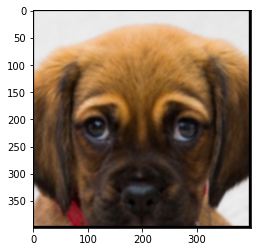

In [24]:
dog_rgb_filtered = np.dstack((r_filter, g_filter, b_filter)).astype(np.uint8)

plt.imshow(dog_rgb_filtered, vmin=0, vmax=255)
plt.show()
plt.imsave('uniform_filtered_dog.png', dog_rgb_filtered)

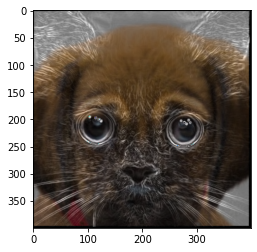

In [25]:
cat_rgb_filter = np.dstack((cat_filtered, cat_filtered, cat_filtered))

composed_img = (0.5 * cat_rgb_filter).astype(np.uint8) + (0.5 * dog_rgb_filter).astype(np.uint8)
plt.imshow(composed_img, vmin=0, vmax=255)
plt.show()
plt.imsave('composed.png', composed_img)